Intro:
 Information project
 dataset
 describe features
 your questions


Methodolgy and result
 EDA
 Analysis


In [22]:
from Scripts.function import load_process
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [38]:
df = load_process("../data/raw/players_stats.csv")

In [3]:
df

,Name,Games Played,Points,Age,Birth_Place,Birthdate,Collage,Experience,Height,Position,Team,Weight,BMI
0,AJ Price,26,133,29.0,us,1986,University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,954,30.0,us,1985,University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,243,20.0,us,1995,University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,213,24.0,us,1991,Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,1156,29.0,do,1986,University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Willie Green,52,306,34.0,us,1981,University of Detroit Mercy,11,190.0,SG,ORL,90.00,24.930748
484,Wilson Chandler,78,1085,28.0,us,1987,DePaul University,7,200.0,SF,DEN,101.25,25.312500
485,Xavier Henry,9,20,24.0,be,1991,University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,778,20.0,us,1995,"University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594


In [6]:
df.describe(exclude=np.object).T

,count,mean,std,min,25%,50%,75%,max
Games Played,350.0,52.517143,24.227160,1.000000,33.000000,60.00000,73.000000,82.000000
Points,350.0,495.825714,428.888777,0.000000,135.250000,397.50000,779.000000,2217.000000
Age,350.0,27.320000,4.138768,20.000000,24.000000,27.00000,30.000000,39.000000
Birthdate,350.0,1987.680000,4.138768,1976.000000,1985.000000,1988.00000,1991.000000,1995.000000
Height,350.0,196.585714,8.626262,172.500000,190.000000,197.50000,202.500000,222.500000
Weight,350.0,98.821286,12.284187,72.450000,90.000000,99.00000,108.000000,162.000000
BMI,350.0,25.480802,1.686314,20.411523,24.305556,25.53211,26.530612,32.723141


In [7]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Name,350,350,Luol Deng,1
Birth_Place,350,23,us,314
Collage,350,112,Duke University,18
Experience,350,18,R,56
Position,350,5,SG,84
Team,350,30,MIN,15


In [8]:
df.isna().sum()

Name            0
Games Played    0
Points          0
Age             0
Birth_Place     0
Birthdate       0
Collage         0
Experience      0
Height          0
Position        0
Team            0
Weight          0
BMI             0
dtype: int64

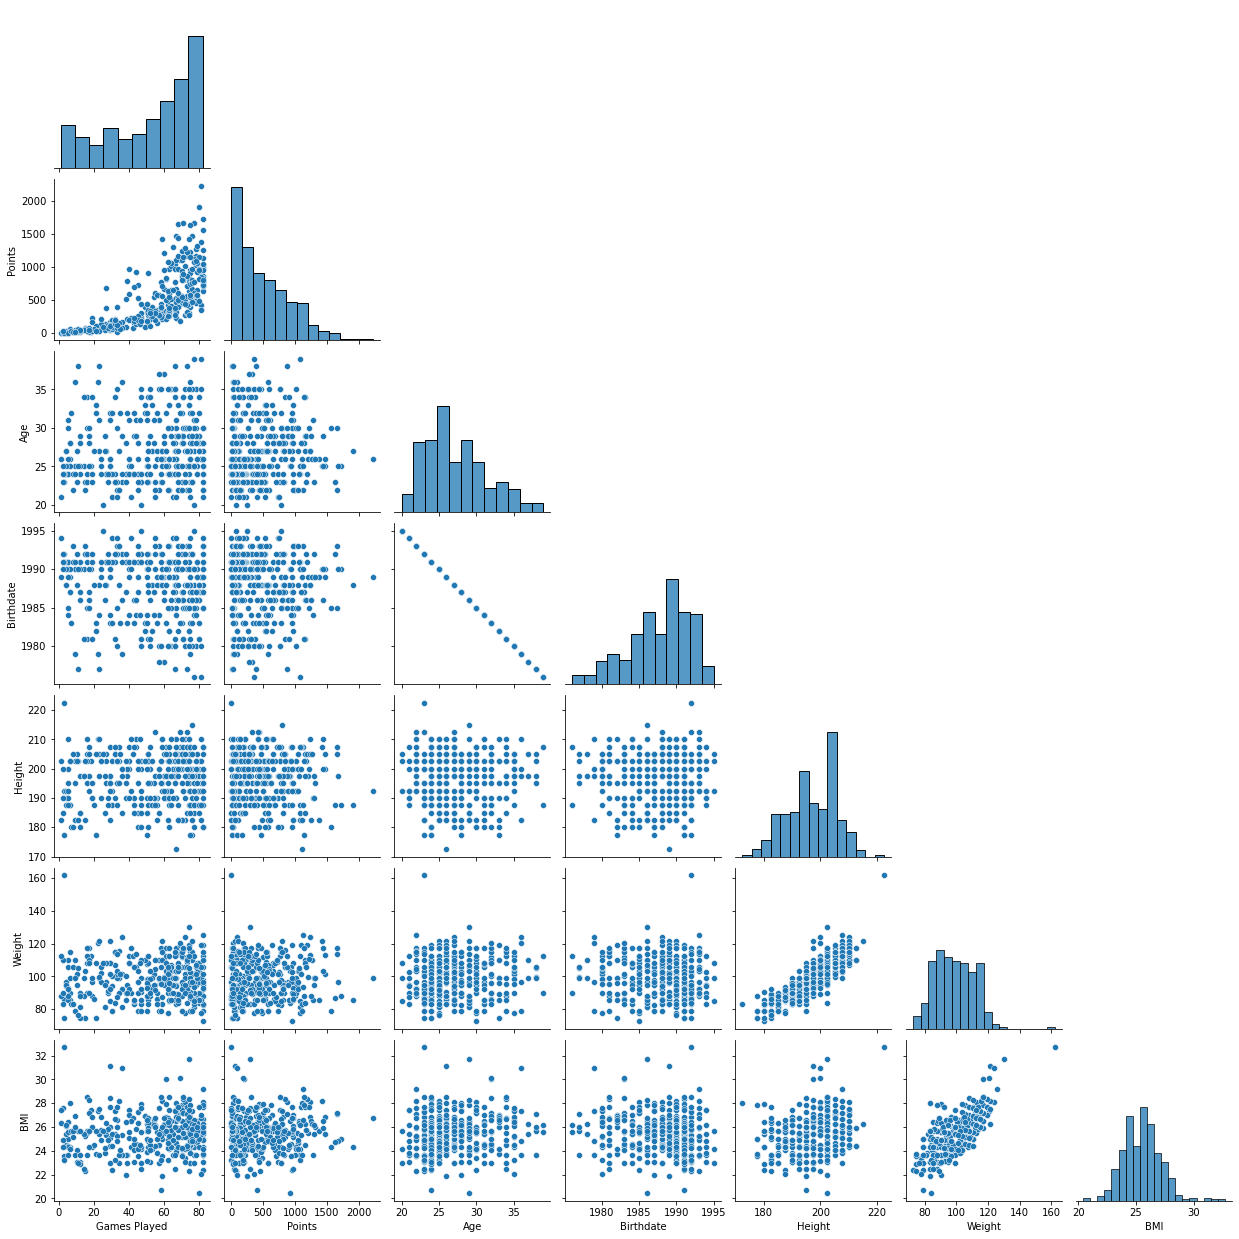

In [10]:
sns.pairplot(data=df.select_dtypes(include='number'), 
             corner=True)

Describe the plot ...

In [19]:
team = (df
        .groupby('Team')['Games Played', 'Age', 'Height', "Weight", 'BMI','Points']
        .mean()
        .sort_values(by='Points',ascending=False)
        .reset_index())

<ipython-input-19-bb1d5629c19f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team = (df


In [20]:
team

,Team,Games Played,Age,Height,Weight,BMI,Points
0,GSW,64.666667,27.166667,199.583333,101.625000,25.439073,720.500000
1,POR,61.230769,27.384615,196.730769,96.992308,24.917914,656.923077
2,BOS,60.750000,25.625000,192.812500,98.325000,26.338129,648.500000
3,HOU,51.857143,27.857143,194.642857,98.807143,26.007952,646.000000
4,ATL,58.083333,27.916667,197.500000,101.700000,26.022077,599.083333
5,LAC,51.071429,29.428571,195.714286,98.067857,25.459170,574.785714
6,TOR,56.666667,28.222222,197.500000,102.500000,26.232891,551.555556
7,NOH,52.500000,26.071429,194.107143,96.396429,25.516502,549.000000
8,DEN,56.666667,26.333333,193.888889,96.200000,25.571526,542.222222
9,IND,57.272727,28.181818,198.409091,101.945455,25.774835,533.363636


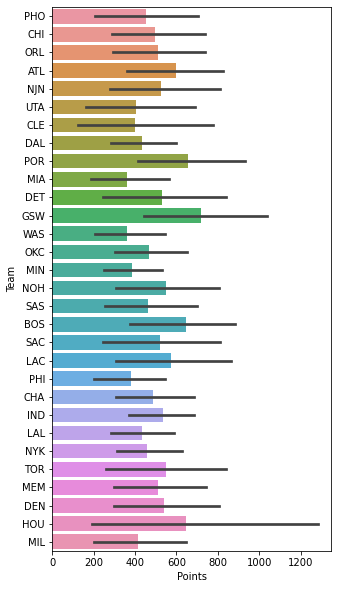

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(5,10)
sns.barplot(data=df,
            x='Points',
            y='Team')

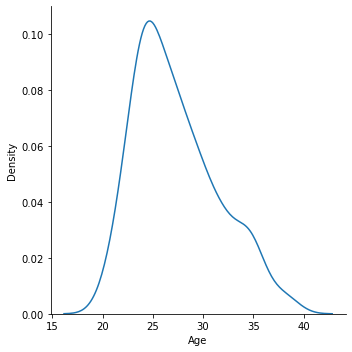

In [71]:

sns.displot(data=df,
              x='Age',
             kind='kde')

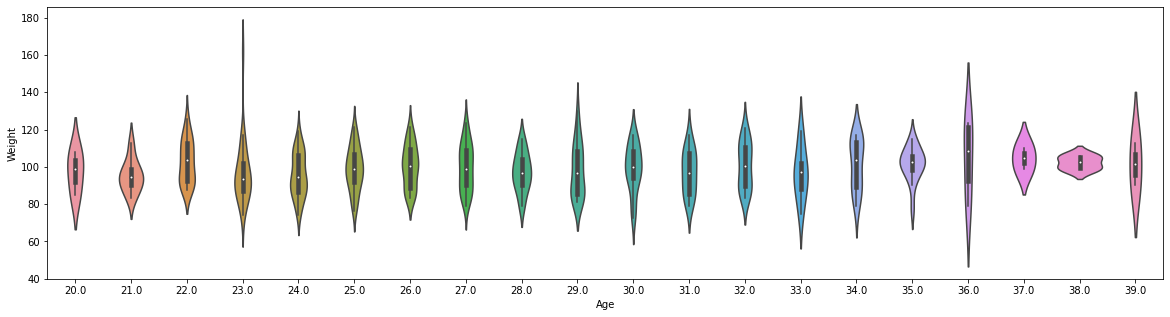

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.violinplot(data=df,
               x='Age',
               y='Weight')

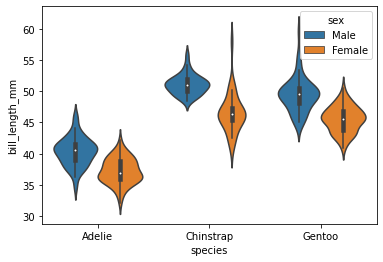

In [32]:

df = sns.load_dataset("penguins")

sns.violinplot(data=df,
               y="bill_length_mm",
               x= "species",
               hue='sex')


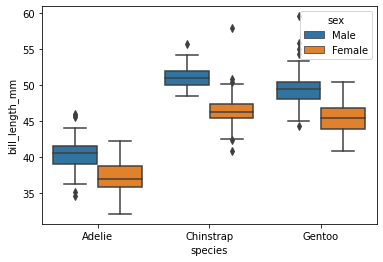

In [35]:
sns.boxplot(data=df,
               y="bill_length_mm",
               x= "species",
               hue='sex')

In [40]:
age = (df
        .groupby('Age')['Games Played', 'Height', "Weight", 'BMI','Points']
        .mean()
        .sort_values(by='Points',ascending=False)
        .reset_index())

<ipython-input-40-84576576b8f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age = (df


In [41]:
age

,Age,Games Played,Height,Weight,BMI,Points
0,39.0,79.000000,197.500000,101.250000,25.864305,712.500000
1,30.0,62.750000,197.000000,99.225000,25.450422,696.500000
2,29.0,60.000000,195.760870,98.334783,25.551222,639.739130
3,26.0,56.833333,197.083333,100.395000,25.789210,600.566667
4,28.0,58.750000,194.895833,97.368750,25.578091,586.958333
5,27.0,55.818182,197.575758,99.790909,25.461014,575.666667
6,25.0,49.153846,196.923077,98.965385,25.433987,541.410256
7,22.0,55.888889,200.555556,102.650000,25.451429,525.444444
8,31.0,49.769231,195.192308,97.061538,25.401253,499.846154
9,34.0,49.500000,198.333333,101.437500,25.673167,464.083333


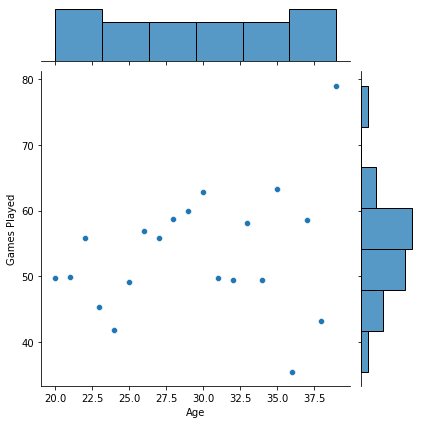

In [44]:
sns.jointplot(data=age,
              x='Age',
              y='Games Played')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

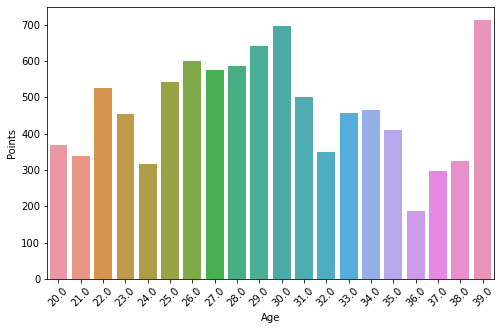

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.barplot(data=age,
            x='Age',
           y='Points')
plt.xticks(rotation=45)

In [53]:
college = (df
        .groupby('Collage')['Games Played', 'Height', "Weight", 'BMI','Points']
        .mean()
        .sort_values(by='Points',ascending=False)
        .reset_index())

<ipython-input-53-14f3e1f94661>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  college = (df


In [54]:
college

,Collage,Games Played,Height,Weight,BMI,Points
0,Davidson College,80.0,187.5,85.50,24.320000,1900.0
1,Weber State University,82.0,187.5,87.75,24.960000,1720.0
2,University of Oklahoma,67.0,205.0,112.95,26.876859,1469.0
3,Louisiana Tech University,73.0,200.0,110.70,27.675000,1218.0
4,Arizona State University,66.0,197.5,103.50,26.526795,1177.0
...,...,...,...,...,...,...
107,Oregon State University,19.0,190.0,87.75,24.307479,35.0
108,University of Notre Dame,16.0,202.5,117.00,28.532236,27.0
109,University of Tennessee at Martin,5.0,187.5,85.50,24.320000,18.0
110,University of Montana,8.0,180.0,83.25,25.694444,15.0


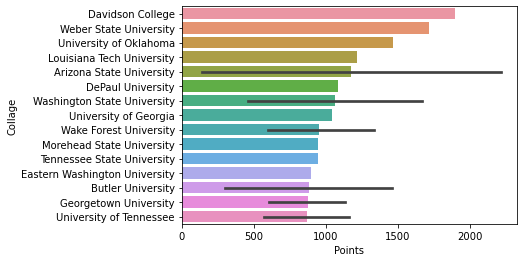

In [58]:
sns.barplot(data=df,
            x='Points',
            y='Collage',
            order= list(college['Collage'])[:15])

Conclusion

....

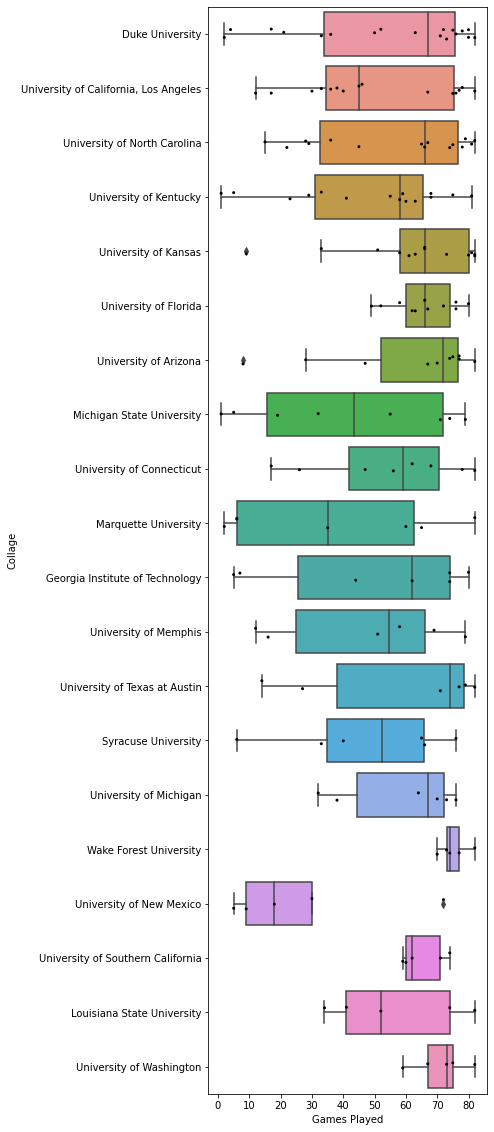

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(5,20)


sns.boxplot(data=df,
            x='Games Played',
            y='Collage',
            order = df['Collage'].value_counts().index[:20])

sns.stripplot(data=df,
              x='Games Played',
            y='Collage',
              color= 'black',
              size=3,
            order = df['Collage'].value_counts().index[:20])